In [173]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import parsec as prs
from foil_eval import *

In [175]:
# Load MATLAB genomes and expressed foils
import scipy.io as sio
m_gene = sio.loadmat('m_gene.mat')['m_gene']
m_foil = sio.loadmat('m_foil.mat')['m_foil']

In [188]:
# Express foil with python parsec
#p_foil = np.zeros(m_foil.shape)
p_foil = np.zeros((500,200,2))
foil = prs.Airfoil()
for i, gene in enumerate (m_gene):    
    p_foil[i] = foil.express(gene).T

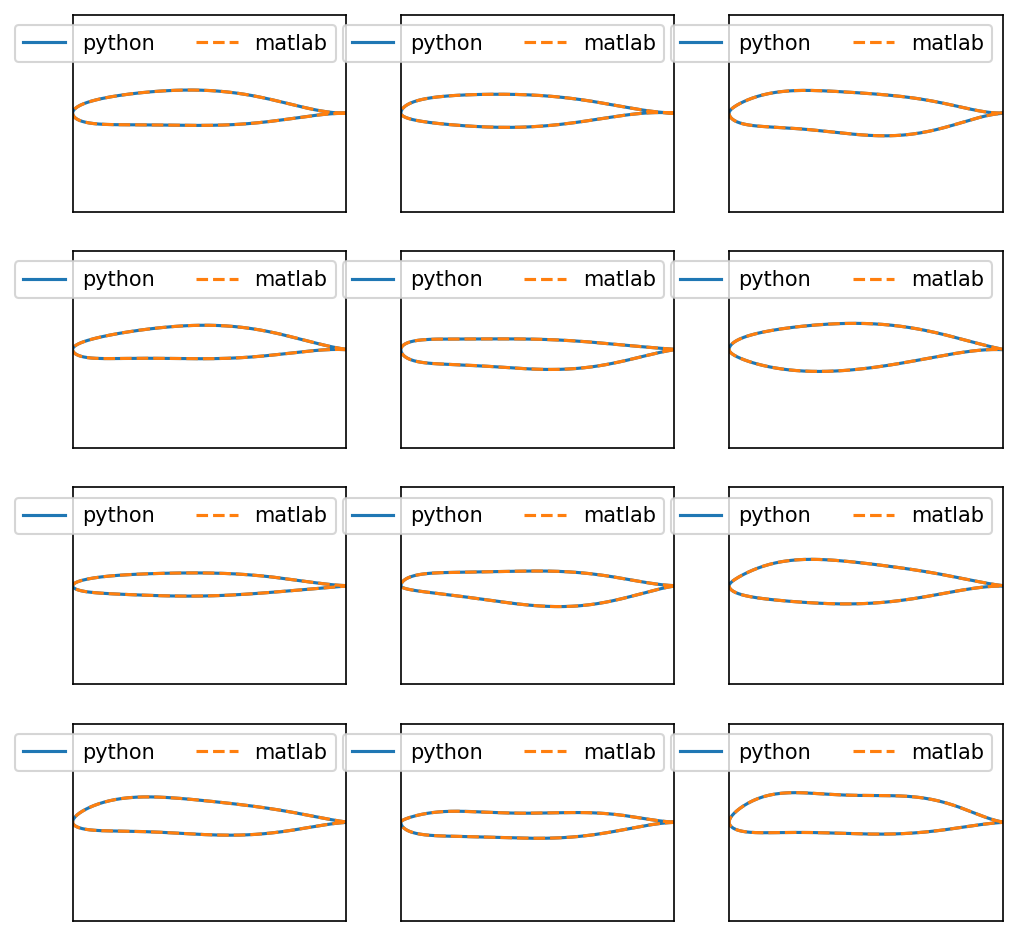

In [189]:
# Compare geometry visually
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(8,8),dpi=150)
ax = ax.ravel()
for i in range(len(ax)):
    p = p_foil[i]
    m = m_foil[i]
    ax[i].plot(p[:,0],p[:,1],label='python')
    ax[i].plot(m[:,0],m[:,1],'--',label='matlab')
    ax[i].set(xticks=[],yticks=[],xlim=(0,1),ylim=(-0.5,0.5))
    ax[i].legend(ncol=2)


In [190]:
# Compare geometry numerically 
diff = (p_foil-m_foil)
plt.hist(diff.ravel())
plt.show()

ValueError: operands could not be broadcast together with shapes (500,200,2) (500,400,2) 